In [1]:
from tkinter import *
# by Canvas I can't save image, so i use PIL
import PIL
from PIL import Image, ImageDraw
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pyttsx3
from IPython.display import clear_output
import os



In [2]:
engine = pyttsx3.init()
engine.setProperty('rate', 125)


In [3]:
os.remove('image.png')

In [4]:
def save():
	#filename = 'image1.png'
	#image1.save(filename)
	clear_output()
	img = np.array(image1)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	img = cv2.bitwise_not(img)
	img = np.expand_dims(img, axis=-1)
	img = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_NEAREST)
	plt.figure(figsize=(10,10))
	plt.imshow(img, cmap='gray')
	plt.show()
	try:
		os.remove('image.png')
	except: pass
	cv2.imwrite('image.png', img)
	img = np.array(img).reshape(-1, 28,28,1) / 255.0
	print(img.shape)
	pred = model.predict(img)[0]
	ind = (-pred).argsort()[:5]
	latex = [classes[x] for x in ind]
	pr = [pred[ind[i]] for i in range(5)]
	print(latex)
	print(pr)
	for i in range(5):
		if classes[ind[i]] == classes[n]:
			engine.say("Great You won.")
			engine.runAndWait()


	engine.say("You draw {}.".format(classes[ind[0]]))
	engine.say("or You draw {}.".format(classes[ind[1]]))
	engine.say("or You draw {}.".format(classes[ind[2]]))
	engine.runAndWait()
	

	
	#image1 = 0
	img = 0


In [5]:
def paint(event):
    x1, y1 = (event.x), (event.y)
    x2, y2 = (event.x + 20), (event.y + 20)
    cv.create_oval((x1, y1, x2, y2), fill='black', width=15)
    #  --- PIL
    draw.line((x1, y1, x2, y2), fill='black', width=15)



In [6]:
def clear():
    cv.delete("all")
    draw.rectangle((0, 0, 640, 640), fill='white')
    #image1 = 0


In [7]:
f = open("class_names.txt","r")
# And for reading use
classes = f.readlines()
f.close()
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(type(classes))


model = load_model('keras.h5')


<class 'list'>


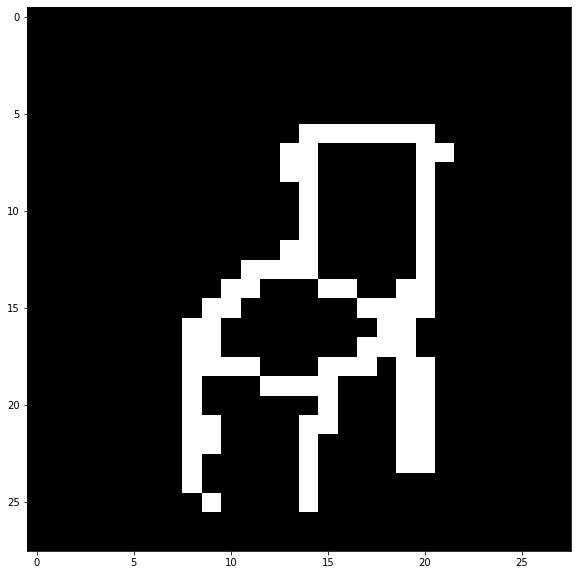

(1, 28, 28, 1)
['chair', 'bird', 'lightning', 'spider', 'shorts']
[0.7670777, 0.091598414, 0.07603939, 0.011355998, 0.010264593]


In [15]:
root = Tk()

cv = Canvas(root, width=640, height=640, bg='white')
# --- PIL
image1 = PIL.Image.new('RGB', (640, 640), 'white')
draw = ImageDraw.Draw(image1)
# ---- 
cv.bind('<B1-Motion>', paint)
cv.pack(expand=YES, fill=BOTH)

btn_save = Button(text="save", command=save)
btn_save.pack()

btn_clear = Button(text = "clear", command=clear)
btn_clear.pack()

txt = Text(root, width=10,height=1)
n = int(np.random.randint(0,100,1))
print(n)
txt.insert(INSERT, classes[n])
txt.config(state=DISABLED)
txt.pack()


root.mainloop()


In [58]:
classes

['axe',
 'ice_cream',
 'lollipop',
 'helmet',
 'face',
 'apple',
 'dumbbell',
 'anvil',
 'bicycle',
 'ladder',
 'wheel',
 'cloud',
 'pillow',
 'headphones',
 'pizza',
 'cookie',
 'light_bulb',
 'moon',
 'broom',
 'key',
 'eye',
 'sock',
 'diving_board',
 'hammer',
 'hat',
 'stop_sign',
 'umbrella',
 'shovel',
 'laptop',
 'paper_clip',
 'microphone',
 'pants',
 'car',
 'shorts',
 'beard',
 'coffee_cup',
 'spider',
 'donut',
 'triangle',
 'rifle',
 'bread',
 'mountain',
 'square',
 'clock',
 'envelope',
 'grapes',
 'circle',
 'butterfly',
 'tennis_racquet',
 'sword',
 'spoon',
 'hot_dog',
 'baseball_bat',
 'tent',
 'chair',
 'bird',
 'knife',
 'eyeglasses',
 'power_outlet',
 'lightning',
 'ceiling_fan',
 'basketball',
 'bridge',
 'wristwatch',
 'mushroom',
 'bench',
 'baseball',
 'saw',
 'table',
 'cat',
 'tooth',
 'radio',
 'tree',
 'traffic_light',
 'candle',
 'rainbow',
 'snake',
 'smiley_face',
 'book',
 'cell_phone',
 'sun',
 'suitcase',
 'frying_pan',
 'drums',
 'scissors',
 'bed',